In [1]:
#importing the required libraries
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score, confusion_matrix
%matplotlib inline

from sklearn.feature_extraction.text import CountVectorizer 

In [2]:
hmeq = pd.read_csv('hmeq.csv')

In [3]:
hmeq.head(10)

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN
5,1,1700,30548.0,40320.0,HomeImp,Other,9.0,0.0,0.0,101.466002,1.0,8.0,37.113614
6,1,1800,48649.0,57037.0,HomeImp,Other,5.0,3.0,2.0,77.100000,1.0,17.0,NaN
7,1,1800,28502.0,43034.0,HomeImp,Other,11.0,0.0,0.0,88.766030,0.0,8.0,36.884894
8,1,2000,32700.0,46740.0,HomeImp,Other,3.0,0.0,2.0,216.933333,1.0,12.0,NaN
9,1,2000,NaN,62250.0,HomeImp,Sales,16.0,0.0,0.0,115.800000,0.0,13.0,NaN


In [4]:
hmeq.shape

(5960, 13)

In [5]:
hmeq.dtypes

BAD          int64
LOAN         int64
MORTDUE    float64
VALUE      float64
REASON      object
JOB         object
YOJ        float64
DEROG      float64
DELINQ     float64
CLAGE      float64
NINQ       float64
CLNO       float64
DEBTINC    float64
dtype: object

In [6]:
hmeq.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
BAD,5960.0,0.199497,0.399656,0.000000,0.000000,0.000000,0.000000,1.000000
LOAN,5960.0,18607.969799,11207.480417,1100.000000,11100.000000,16300.000000,23300.000000,89900.000000
MORTDUE,5442.0,73760.817200,44457.609458,2063.000000,46276.000000,65019.000000,91488.000000,399550.000000
VALUE,5848.0,101776.048741,57385.775334,8000.000000,66075.500000,89235.500000,119824.250000,855909.000000
YOJ,5445.0,8.922268,7.573982,0.000000,3.000000,7.000000,13.000000,41.000000
DEROG,5252.0,0.254570,0.846047,0.000000,0.000000,0.000000,0.000000,10.000000
DELINQ,5380.0,0.449442,1.127266,0.000000,0.000000,0.000000,0.000000,15.000000
CLAGE,5652.0,179.766275,85.810092,0.000000,115.116702,173.466667,231.562278,1168.233561
NINQ,5450.0,1.186055,1.728675,0.000000,0.000000,1.000000,2.000000,17.000000
CLNO,5738.0,21.296096,10.138933,0.000000,15.000000,20.000000,26.000000,71.000000


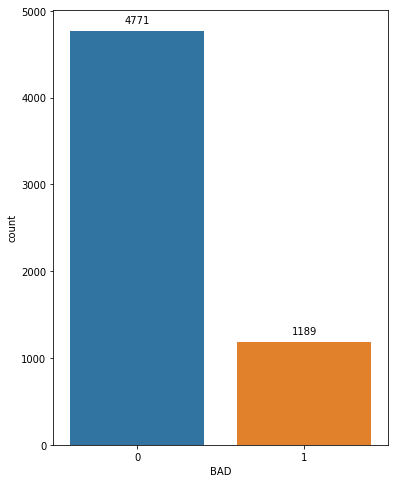

In [7]:
plt.figure(figsize=(6, 8))
splot = sns.countplot(hmeq['BAD'])
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

In [8]:
def miss_data(df):
    x = ['Variable','Missing rate','Count of Distinct Values']
    missing_data = pd.DataFrame(columns=x)
    columns = df.columns
    for col in columns:
        icolumn_name = col
        imissing_in_percentage = (df[col].isnull().sum()/df[col].shape[0])*100
        idistinct_values=df[col].nunique()

        missing_data.loc[len(missing_data)] = [icolumn_name, imissing_in_percentage, idistinct_values]
        missing_data.sort_values('Missing rate', ascending=False,inplace=True)
    return missing_data

In [9]:
hmeq_missing = miss_data(hmeq)

In [10]:
def show_values_on_bars(axs, h_v="v", space=0.4):
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                value = int(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height()
                value = int(p.get_width())
                ax.text(_x, _y, value, ha="center")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

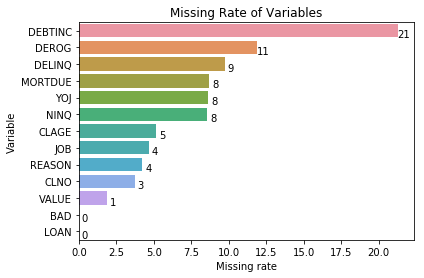

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

fig = sns.barplot(x ='Missing rate', y ='Variable', data = hmeq_missing)
show_values_on_bars(fig,"h",0.4)
plt.title("Missing Rate of Variables")
plt.show(fig)

In [12]:
import missingno as msno

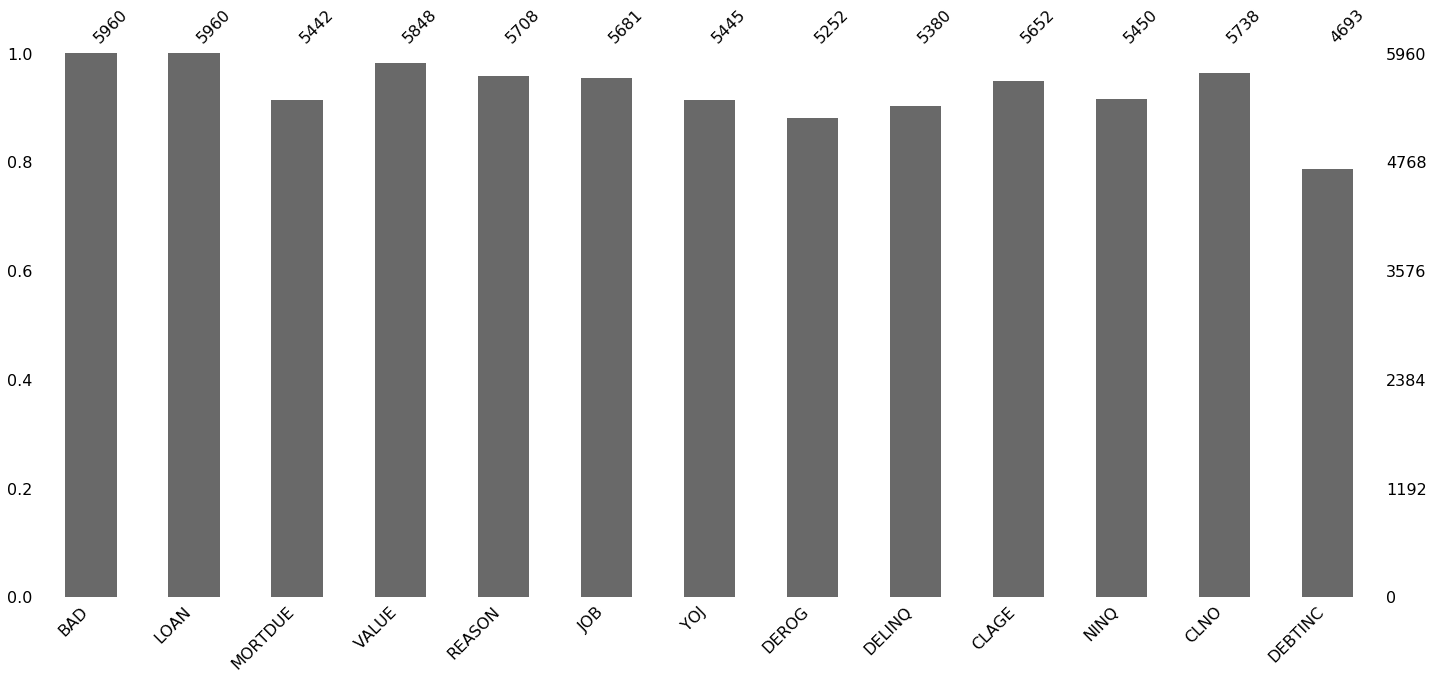

In [13]:
msno.bar(hmeq)

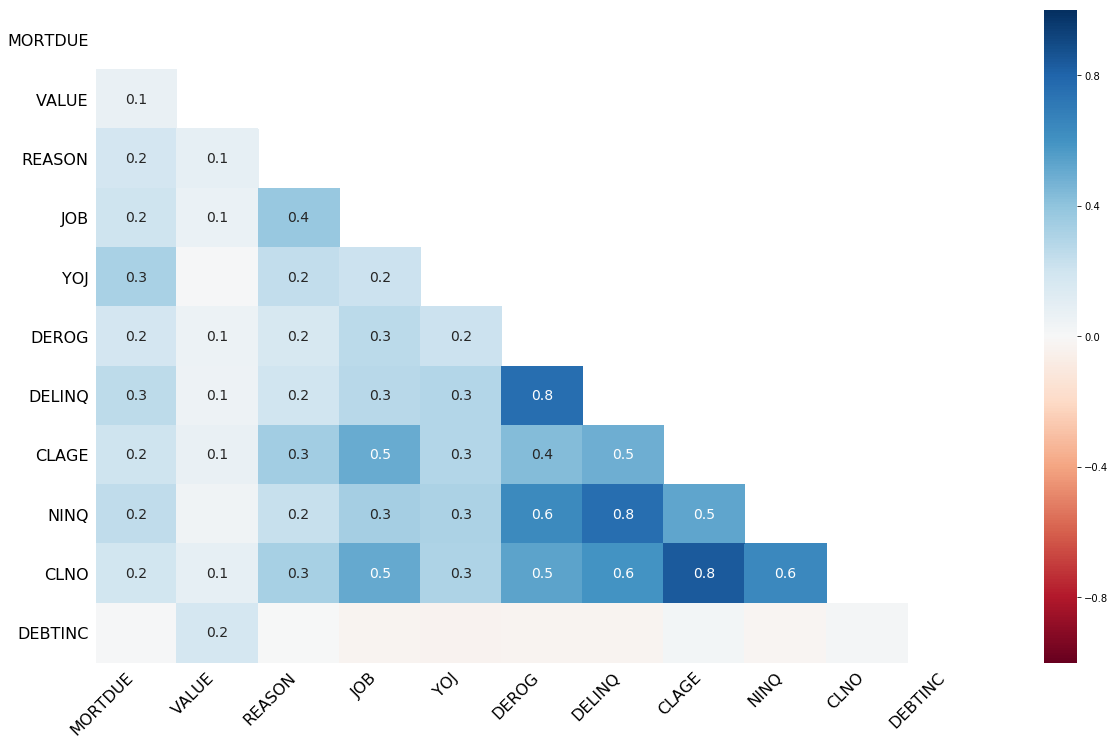

In [14]:
#The missingno correlation heatmap measures nullity correlation: how strongly the presence or absence
#of one variable affects the presence of another:
msno.heatmap(hmeq)

# Replacing categorical null values with mode and numerical with median for first iteration

In [15]:
a=hmeq.JOB.mode()
b=hmeq.REASON.mode()

In [16]:
hmeq.JOB.fillna(a[0],inplace=True)
hmeq.REASON.fillna(b[0],inplace=True)

In [17]:
hmeq1=hmeq.drop(['BAD','LOAN','REASON','JOB'],axis=1)

In [18]:
for col in hmeq1.columns:
    hmeq[col].fillna(hmeq[col].median(), inplace=True)

In [19]:
dummy = pd.get_dummies(hmeq[['JOB','REASON']])
dummy.head(10)

,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self,REASON_DebtCon,REASON_HomeImp
0,0,0,1,0,0,0,0,1
1,0,0,1,0,0,0,0,1
2,0,0,1,0,0,0,0,1
3,0,0,1,0,0,0,1,0
4,0,1,0,0,0,0,0,1
5,0,0,1,0,0,0,0,1
6,0,0,1,0,0,0,0,1
7,0,0,1,0,0,0,0,1
8,0,0,1,0,0,0,0,1
9,0,0,0,0,1,0,0,1


In [20]:
hmeq = pd.concat([hmeq,dummy],axis=1)

In [21]:
hmeq.drop(['JOB','REASON'],axis=1,inplace=True)

In [22]:
# splitting data into training and test set for independent attributes
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =train_test_split(hmeq.drop('BAD',axis=1), hmeq['BAD'], test_size=.25,
                                                   random_state=1)
X_train.shape,X_test.shape

((4470, 18), (1490, 18))

In [23]:
# invoking the decision tree classifier function. Using 'entropy' method of finding the split columns.
model_entropy=DecisionTreeClassifier(criterion='entropy',random_state = 100, 
            max_depth = 3, min_samples_leaf = 5)

In [24]:
model_entropy.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [25]:
model_entropy.score(X_train, y_train)  # performance on train data

0.8677852348993289

In [26]:
model_entropy.score(X_test, y_test)  # performance on test data

0.8536912751677852

In [27]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
import graphviz

xvar = hmeq.drop('BAD', axis=1)
feature_cols = xvar.columns

C:\Users\Suprabha\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


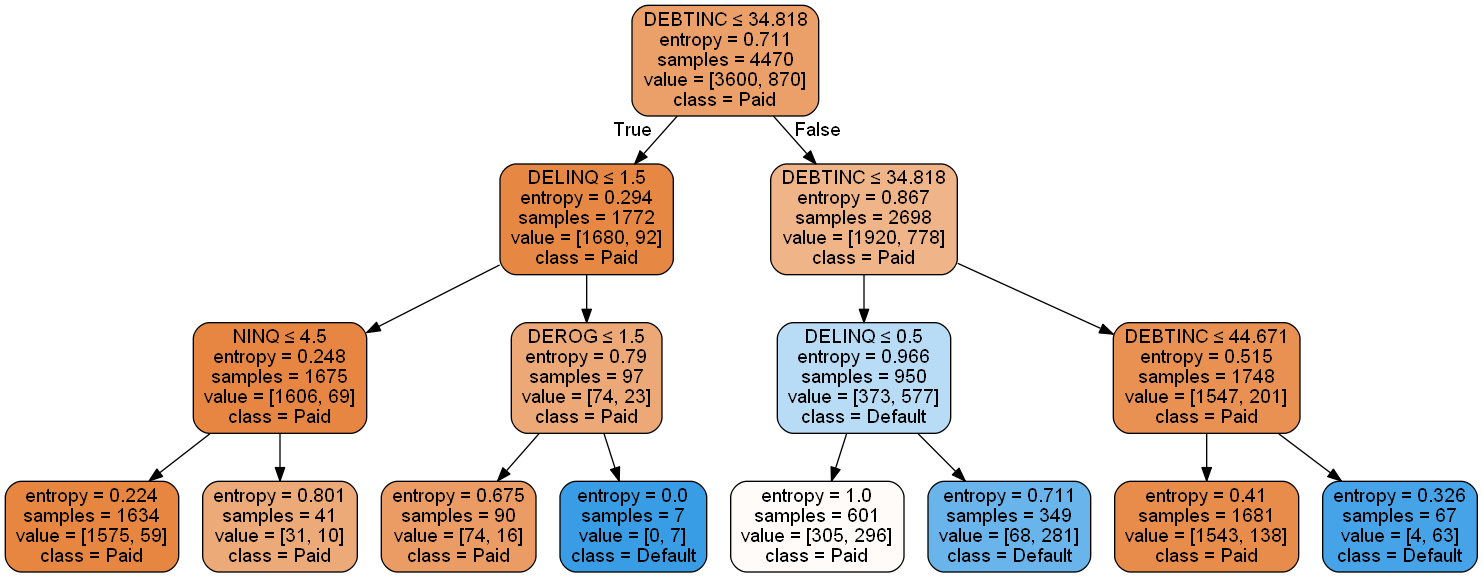

In [28]:
dot_data = StringIO()
export_graphviz(model_entropy, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['Paid','Default'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('df_pruned.png')
Image(graph.create_png())

width = .35 # width of a bar

hmeq_missing['Missing rate'].plot(kind='bar', width = width)
hmeq_missing['Count of Distinct Values'].plot(secondary_y=True)

ax = plt.gca()
plt.xlim([-width, len(hmeq_missing['Missing rate'])-width])
ax.set_xticklabels(hmeq_missing['Variable'].tolist())

plt.show()

# Second Iteration- Mean encoding and replacing categorical nulls with zero

In [32]:
hmeq = pd.read_csv('hmeq.csv')

In [33]:
hmeq.JOB.fillna(0,inplace=True)
hmeq.REASON.fillna(0,inplace=True)

In [34]:
for col in hmeq1.columns:
    hmeq[col].fillna(hmeq[col].median(), inplace=True)

In [37]:
mean_encode_job = hmeq.groupby('JOB')['BAD'].mean()
print(mean_encode_job)
hmeq.loc[:,'Job_mean_enc']=hmeq['JOB'].map(mean_encode_job)
hmeq

JOB
0          0.082437
Mgr        0.233377
Office     0.131857
Other      0.231993
ProfExe    0.166144
Sales      0.348624
Self       0.300518
Name: BAD, dtype: float64


,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,Job_mean_enc
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,34.818262,0.231993
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,34.818262,0.231993
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,34.818262,0.231993
3,1,1500,65019.0,89235.5,0,0,7.0,0.0,0.0,173.466667,1.0,20.0,34.818262,0.082437
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,34.818262,0.131857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5955,0,88900,57264.0,90185.0,DebtCon,Other,16.0,0.0,0.0,221.808718,0.0,16.0,36.112347,0.231993
5956,0,89000,54576.0,92937.0,DebtCon,Other,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971,0.231993
5957,0,89200,54045.0,92924.0,DebtCon,Other,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590,0.231993
5958,0,89800,50370.0,91861.0,DebtCon,Other,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882,0.231993


In [38]:
mean_encode_reason = hmeq.groupby('REASON')['BAD'].mean()
print(mean_encode_reason)
hmeq.loc[:,'Reason_mean_enc']=hmeq['REASON'].map(mean_encode_reason)
hmeq

REASON
0          0.190476
DebtCon    0.189664
HomeImp    0.222472
Name: BAD, dtype: float64


,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,Job_mean_enc,Reason_mean_enc
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,34.818262,0.231993,0.222472
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,34.818262,0.231993,0.222472
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,34.818262,0.231993,0.222472
3,1,1500,65019.0,89235.5,0,0,7.0,0.0,0.0,173.466667,1.0,20.0,34.818262,0.082437,0.190476
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,34.818262,0.131857,0.222472
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5955,0,88900,57264.0,90185.0,DebtCon,Other,16.0,0.0,0.0,221.808718,0.0,16.0,36.112347,0.231993,0.189664
5956,0,89000,54576.0,92937.0,DebtCon,Other,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971,0.231993,0.189664
5957,0,89200,54045.0,92924.0,DebtCon,Other,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590,0.231993,0.189664
5958,0,89800,50370.0,91861.0,DebtCon,Other,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882,0.231993,0.189664


In [39]:
hmeq.drop(['JOB','REASON'],axis=1,inplace=True)

In [40]:
# splitting data into training and test set for independent attributes
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =train_test_split(hmeq.drop('BAD',axis=1), hmeq['BAD'], test_size=.25,
                                                   random_state=1)
X_train.shape,X_test.shape

((4470, 12), (1490, 12))

In [41]:
# invoking the decision tree classifier function. Using 'entropy' method of finding the split columns.
model_entropy=DecisionTreeClassifier(criterion='entropy',random_state = 100, 
            max_depth = 3, min_samples_leaf = 5)

In [42]:
model_entropy.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [43]:
model_entropy.score(X_train, y_train)  # performance on train data

0.8677852348993289

In [44]:
model_entropy.score(X_test, y_test)  # performance on test data

0.8536912751677852

In [45]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
import graphviz

xvar = hmeq.drop('BAD', axis=1)
feature_cols = xvar.columns

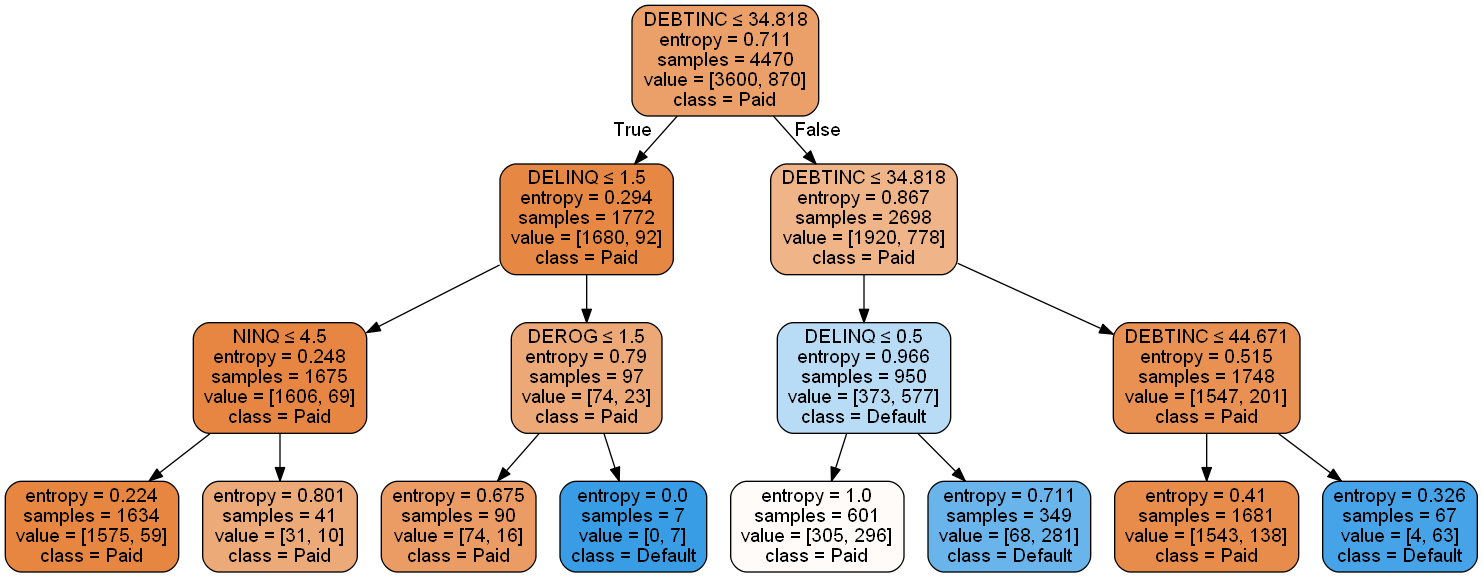

In [46]:
dot_data = StringIO()
export_graphviz(model_entropy, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['Paid','Default'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('df_pruned.png')
Image(graph.create_png())